<a href="https://colab.research.google.com/github/shihab7219/VGG16-Implementation/blob/main/VVG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.models import Sequential , load_model , Model
from tensorflow.keras.layers import Dense ,Conv2D , MaxPooling2D , AveragePooling2D , Flatten ,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import backend as k
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

In [11]:
trainData = "training_set/"
testData = "test_set/"

In [12]:
len(os.listdir(trainData))

2

In [17]:
trainDatasetsClass = os.listdir(trainData)


In [19]:
trainDatasetsClass

['dogs', 'cats']

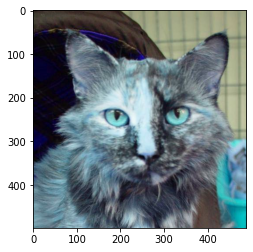

In [22]:
catImage = cv2.imread("training_set/cats/cat.10.jpg")

plt.imshow(catImage)
plt.show()

<function matplotlib.pyplot.show>

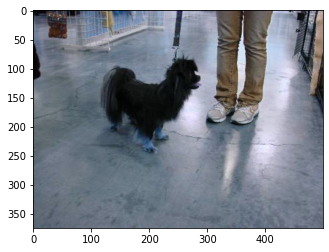

In [23]:
dogImage = cv2.imread("training_set/dogs/dog.1000.jpg")

plt.imshow(dogImage)
plt.show

In [25]:
trainDataGenerator = ImageDataGenerator()

trainDataGenerator = trainDataGenerator.flow_from_directory("training_set/",
                                        target_size = (224,224),
                                        batch_size = 32,
                                        shuffle = True,
                                        class_mode = "binary")

Found 8005 images belonging to 2 classes.


In [27]:
testDataGenerator = ImageDataGenerator()
testDataGenerator = testDataGenerator.flow_from_directory("test_set/",
                                                          target_size = (224,224),
                                                          batch_size = 32,
                                                          shuffle = False,
                                                          class_mode = "binary")

Found 2023 images belonging to 2 classes.


In [29]:
model = Sequential()

# 1st Layer
model.add(Conv2D(input_shape = (224, 224, 3), filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# 2nd Layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#3rd Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#4th Layer
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#5th Layer
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), name = 'vgg16'))

model.add(Flatten(name = "flatten"))


model.add(Dense(256, activation = 'relu', name = 'fcN1'))
model.add(Dense(128, activation = 'relu', name = 'fcN2'))
model.add(Dense(1, activation = "sigmoid", name = 'output'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [31]:
models = Model(inputs = model.input, outputs = model.get_layer('vgg16').output)

In [32]:
models